In [2]:
import pandas as pd
import scipy
import numpy as np
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv("C:/Users/HAMID/Documents/Tugas Kuliah Hamid/K-Beta DatMin/dataTrain.csv",names=names)



In [10]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Membuat data tabel (dataframe) menjadi array

In [24]:
array=df.values
print(array)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


# Cara memilih beberapa bagian array

In [21]:
A = array[:,5:8] #memilih array setiap baris dengan kolom 5 sampai 8
print(A)

[[33.6    0.627 50.   ]
 [26.6    0.351 31.   ]
 [23.3    0.672 32.   ]
 ...
 [26.2    0.245 30.   ]
 [30.1    0.349 47.   ]
 [30.4    0.315 23.   ]]


In [26]:
B=array[5:8,:] #memilih array baris ke 5 sampai 8 , dengan setiap kolom juga dipilih
print(B)

[[  5.    116.     74.      0.      0.     25.6     0.201  30.      0.   ]
 [  3.     78.     50.     32.     88.     31.      0.248  26.      1.   ]
 [ 10.    115.      0.      0.      0.     35.3     0.134  29.      0.   ]]


In [42]:
C=array[1:5,[1]] #memilih array baris 1 sampai 5 pada kolom ke 1
print(C)

[[ 85.]
 [183.]
 [ 89.]
 [137.]]


# Mentranspose Array

In [17]:
TransposeArray=np.transpose(array)
print(TransposeArray)

[[  6.      1.      8.    ...   5.      1.      1.   ]
 [148.     85.    183.    ... 121.    126.     93.   ]
 [ 72.     66.     64.    ...  72.     60.     70.   ]
 ...
 [  0.627   0.351   0.672 ...   0.245   0.349   0.315]
 [ 50.     31.     32.    ...  30.     47.     23.   ]
 [  1.      0.      1.    ...   0.      1.      0.   ]]


# Penerapan K-Means

In [3]:
data=df
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Clustering fitur ke 5 dan 7

In [15]:
X=data.iloc[:,[5,7]]

In [16]:
X.head()

,mass,age
0,33.6,50
1,26.6,31
2,23.3,32
3,28.1,21
4,43.1,33


In [17]:
X.describe()

,mass,age
count,768.000000,768.000000
mean,31.992578,33.240885
std,7.884160,11.760232
min,0.000000,21.000000
25%,27.300000,24.000000
50%,32.000000,29.000000
75%,36.600000,41.000000
max,67.100000,81.000000


In [18]:
XData=X.values

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plot

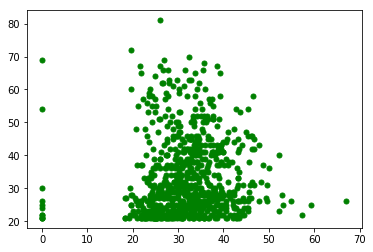

In [19]:
plot.scatter(XData[:,0],XData[:,1],s=25,c='green')
plot.show()

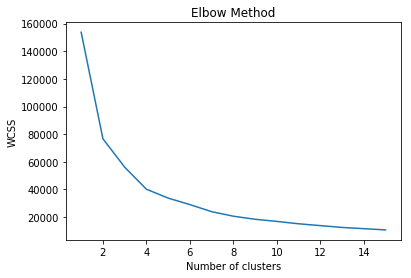

In [20]:
#Penetuan K terbaik dengan Eilbow
wcss = []
for i in range(1,16):#banyak cluster yang inngin di coba dalam kasus ini dari 1-16
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 0)
    kmeans.fit(XData)
    wcss.append(kmeans.inertia_) #Inertia is Sum of squared distances of samples to their closest cluster center.

#Plot Eilbow    
plot.plot(range(1,16),wcss)
plot.title('Elbow Method')
plot.xlabel('Number of clusters')
plot.ylabel('WCSS')
plot.show()


Dari plot eilbow diatas terlihat nilai k terbaik ialah 4 , maka akan dicoba clustering K-Means dengan banyak cluster 4 pada data tersebut 

In [24]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
kmeans.fit(XData)
y=kmeans.fit_predict(XData)
kmeans.cluster_centers_

array([[38.45529954, 25.85714286],
       [34.22110553, 40.03015075],
       [30.06494845, 57.02061856],
       [25.48705882, 25.18039216]])

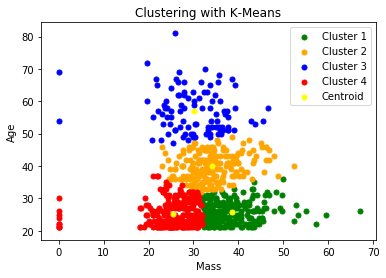

In [26]:
plot.scatter(XData[y==0,0],XData[y==0,1],s=25,c='green',label='Cluster 1')
plot.scatter(XData[y==1,0],XData[y==1,1],s=25,c='orange',label='Cluster 2')
plot.scatter(XData[y==2,0],XData[y==2,1],s=25,c='blue',label='Cluster 3')
plot.scatter(XData[y==3,0],XData[y==3,1],s=25,c='red',label='Cluster 4')

plot.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=25,c='yellow',label='Centroid')

plot.title('Clustering with K-Means')
plot.xlabel('Mass')
plot.ylabel('Age')
plot.legend()
plot.show()

Dengan penerapan K-Means , sebanyak 4 cluster didapat plot seperti diatas , untuk fitur ke 5 dan ke 7 

In [27]:
datafix = pd.DataFrame(X)
# and add the Y
datafix['y'] = y

# split df into cluster groups
grouped = datafix.groupby(['y'], sort=True)

In [28]:
datafix.head()

,mass,age,y
0,33.6,50,2
1,26.6,31,3
2,23.3,32,3
3,28.1,21,3
4,43.1,33,0
